#### AOS 575 - Monte Carlo Example - Lecture, 9/16/2020
Originally coded by Prof. Barnes (CSU), <br>
updated/adapted for Jupyter Notebook/Python3 by Prof. Kay (CU), Last updated: January 10, 2019 <br>
updated for AOS 575 by Prof. Maroon (UWisc)<br>
Last Updated: Sept 14 2020

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt

From Barnes notes p42:<br> In January (31 days), the maximum daily temperature was 2.2 standard
deviations from the climatological mean temperature. If we assume
that the daily temperature is normally distributed, how rare is
it to have a maximum of 2.2 standard deviations or greater in 31 daily samples?

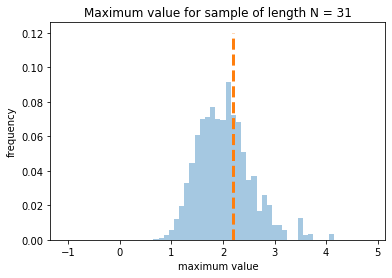

There is a  37.158 % probability of a max larger than  2.2


In [2]:
#What is the likely maximum in a normal distribution with sample size 31?
#can't use z/t statistics for the maximum of a distribution, only the mean!
#Let's Monte Carlo this situation by creating many 31-size normal distributions then selecting the max in each
bin_width = .1
drawn_max = 2.2      #2.2 standard deviations
sample_length = 31   #sample size

Z = np.random.randn(10000,1)    # very large random normal distribution
M = np.empty([100000, 1])

for iloop in range(100000):
    ip = np.random.randint(low=0,high=Z.shape[0],size=sample_length)    #selecting the maximum in a sample of length N
    M[iloop] = np.max(Z[ip])                                            #selecting the maximum from that sample

bin_list = np.arange(-1,5,bin_width)
n, bins = np.histogram(M, bins=bin_list, density=False)
plt.plot([drawn_max, drawn_max],[0, .12],color='C1',linewidth=3,linestyle='--')
plt.bar(bins[0:-1],n/float(len(M)),bin_width, facecolor='C0', alpha=0.4)
#plt.plot(bins[0:-1]+bin_width/2,n/float(len(M)),color='C0')

plt.xlabel('maximum value')
plt.ylabel('frequency')
titlename = 'Maximum value for sample of length N = ' + str(sample_length) 
plt.title(titlename)
plt.show()

print('There is a ', len(M[M>drawn_max])/len(M)*100,'% probability of a max larger than ',drawn_max)